# Configuration de l'environnement

In [56]:
import saspy
sas_session = saspy.SASsession()
sas = sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 44112



In [20]:
# Tester la connection

car_data=sas.sasdata('cars', libref = 'sashelp')
car_data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


# Fichier descriptif de projet: Projet de statistiques exploratoires sous SAS (Master MBFA - Ingénierie Financière - 2023/2024)

Le projet consiste principalement à utiliser un jeu de données réelles issu de l’assurance **Zenor** afin de découvrir les statistiques exploratoires sous SAS. Un fonctionnement en mode projet vous permettra de vous rapprocher des méthodes de travail appliquées en entreprises.

## Objectifs du projet

L’objectif du projet est de comprendre les enjeux de l’analyse de données brutes et ce, jusqu'à l'étape de restitution des résultats. A l'issue de cette étude, les étudiants devront :

- connaître les commandes SAS permettant de produire des statistiques de base ;
- être capables de choisir et mener des analyses descriptives sur SAS ;
- savoir synthétiser les résultats obtenus dans un rapport répondant précisément aux objectifs formulés ;

## Modalités du projet

Les étudiants travailleront lors des cours programmés. Chaque étudiant sera évalué sur l’ensemble des livrables à remettre.

## Problématique

Un nouveau responsable commercial vient de prendre ses fonctions au sein de la société d’assurance Zenor, spécialisée sur le risque 2-roues motorisés. Il ne connait pas l’activité de l’entreprise sur les 3 dernières années et veut atteindre les objectifs suivants:

- augmenter la performance financière ;
  
- attirer plus de moins de 30 ans.

Vous êtes un data analyst et vous devez fournir aux dirigeants les insights qui leur permettront de comprendre l’activité pour qu’il puisse atteindre les objectifs fixés.

Dans un premier temps, le responsable commercial souhaite obtenir :

- un profil des clients : qui sont-ils en matière d’âge, de sexe, de lieu d’habitation, … ? quels contrats possèdent-ils : garanties, quel type de 2-roues, quelle formule d’assurance, … ?

- un tableau de bord contenant quelques indicateurs qui lui permettront de suivre l’activité. Ce tableau de bord devra être accompagné d’une analyse des résultats présentés sous forme de tableau(x). Au cours de vos investigations, en fonction des résultats obtenus, vous pourrez prendre une orientation non envisagée au départ afin d’affiner votre analyse et vos conclusions.

## Organisation et étapes du projet

Les points suivants seront abordés et traités par les étudiants à l’aide des techniques et méthodes étudiées en cours :

- Comprendre et analyser la demande : vous devrez bien identifier les objectifs de l'étude demandée et poser d’éventuelles questions si ce n’est pas clair pour vous.

- Inventorier les données existantes et y apporter un regard critique. Explorer et préparer les données : éventuellement transformer les données, créer de nouvelles variables...

## Analyse de la base de données.

- Définir les indicateurs clefs qui vont permettre d’aider le responsable commercial pour suivre l’activité de ses services.

- Établir un tableau de bord contenant ces indicateurs.

- Proposer des actions pour atteindre les objectifs stratégiques ?

## Livrables

Un rapport synthétique contenant :

- le profil des sociétaires et de leurs contrats ;

- le tableau de bord et son analyse ;

- les actions proposées pour atteindre les objectifs.

Une présentation orale de ces éléments en 15 minutes par groupe.

Un rapport individuel sur le déroulé de ce cours sous forme de projet : comment vous avez vaincu le projet, quelles ont été vos difficultés, comment vous les avez surmontées, qu’est-ce que vous en retenez pour la suite de votre vie professionnelle. Ce rapport individuel sera noté sur la qualité de rédaction.



# Codage et Analyse

## Création des folders et subfolders pour le projet

In [3]:
%%SAS sas

data _null_;
   folderPath = '/home/u63569909'; 
   rc = dcreate('TwoWheelMotorProject', folderPath);
   rc = dcreate('data_original', folderPath!!'/TwoWheelMotorProject');
   rc = dcreate('data_processed', folderPath!!'/TwoWheelMotorProject');
   rc = dcreate('data_out', folderPath!!'/TwoWheelMotorProject');
run;


## Initialisation des bibliothèques nécessaires pour l’exécution des programs

In [57]:
sas_commands = """
%let path=~/TwoWheelMotorProject;  
libname data base "&path/data_processed";
libname out base "&path/data_out";
"""
sas_result = sas.submitLST(sas_commands)
sas_result

**Importation des banques de données**

In [34]:
%%SAS sas

proc import datafile="&path/data_original/BDD_CONTRAT.txt"
            dbms=tab
            out=data.contrat
            replace;
    guessingrows=1000;
    getnames=yes;
    datarow=2;
run;

proc contents data=data.contrat;
run;

proc import datafile="&path/data_original/BDD_SOC.txt"
            dbms=tab
            out=data.soc
            replace;
    guessingrows=40000;
    getnames=yes;
    datarow=2;
run;

proc contents data=data.soc;
run;

proc import datafile="&path/data_original/BDD_VEHICULE.txt"
            dbms=tab
            out=data.vehicule
            replace;
    guessingrows=1000;
    getnames=yes;
    datarow=2;
run;

proc contents data=data.vehicule;
run;

## Tri de données et suppression des doublons

In [35]:
%%SAS sas

proc sort data=data.vehicule out=data.vehicule_nodup nodupkey 
		dupout=out.vehicule_dup;
	by contrat_id;
run;

## Fusion des données et création un tableau final pour travailler

In [36]:
%%SAS sas

proc sort data=data.soc;
	by societaire_nu;
run;

proc sort data=data.contrat;
	by societaire_nu;
run;

data soc_contrat;
	merge data.soc (in=A) data.contrat (in=B);
	by societaire_nu;

	if A and B;
run;

proc sort data=soc_contrat;
	by contrat_id;
run;

proc sort data=data.vehicule_nodup;
	by contrat_id;
run;

data data.soc_contrat_vehiculenodup;
	merge soc_contrat (in=A) data.vehicule_nodup (in=B);
	by contrat_id;

	if A and B;
run;

proc datasets library=data;
	change soc_contrat_vehiculenodup=datafinal_nodup;
	run;

proc sort data=data.vehicule;
	by contrat_id;
run;

data data.soc_contrat_vehiculewdup;
	merge soc_contrat (in=A) data.vehicule (in=B);
	by contrat_id;

	if A and B;
run;

proc datasets library=data;
	change soc_contrat_vehiculewdup=datafinal_wdup;
	run;

data data.datafinal;
	set data.datafinal_nodup;
run;

## Vérification de l'exactitude de datafinal

In [37]:
%%SAS sas

proc contents data = data.datafinal; run;

In [43]:
%%SAS sas

proc print data=data.datafinal (obs=10); run;

Obs,societaire_nu,personne_id,code_postal_cd,societaire_anciennete_dt,societaire_sexe_cd,societaire_naissance_dt,bureau_gestion_cd,societaire_drom_pom_com_in,societaire_csp_cd,contrat_id,canal_souscription_cd,saisie_contrat_dt,contrat_distrib_lb,produit_cd,formule_cd,prime_annuelle_ht_mt,partenaire_cd,fractionnement_cd,mise_circulation_dt,vocation_cd,marque_vehicule_lb
1,956602,1095021,78630,06SEP2020,2,16MAR1973,92,A,-1,1262361,TE,09SEP2020,En direct,PSTD,PSTD3,"29,442,000",-1,A,01JUN2013,TM,BMW
2,966728,2039456,98870,01JAN2021,2,17APR1965,157,P,-1,1307994,BU,03MAY2022,Courtage,PAUTH,PAUTH2,"18,791,000",AGPM,A,01JAN2007,B,KAWASAKI
3,967063,2174302,54280,01JAN2021,2,17SEP1965,103,A,-1,1309485,BU,03NOV2020,En direct,PSTD,PSTD3,"37,926,000",-1,A,01AUG2018,TMR,HONDA
4,967083,2180790,88500,01JAN2021,2,08JAN1964,23,A,-1,1309567,BU,12JUL2023,En direct,PSTD,PSTD3,"54,549,000",-1,M,01JUL2017,BS,BMW
5,967144,2160184,06000,27NOV2020,2,25JUL1973,41,A,-1,1309872,TE,23SEP2023,En direct,PAUTH,PAUTH1,"29,984,000",-1,A,01MAR2007,SCS,YAMAHA
6,967819,2186145,40090,01JAN2021,2,08APR1960,147,A,50,1312905,BU,25JAN2022,En direct,PSTD,PSTD3,"60,369,000",-1,A,01JUL2020,BS,DUCATI
7,811887,1025425,38200,29JUN2017,2,29NOV1960,39,A,40,1314414,TE,17JUN2021,En direct,PAUTH,PAUTH1,"10,723,000",-1,A,01JUL2005,B,HONDA
8,968269,2185582,33300,01FEB2021,2,03MAR1966,9,A,40,1314877,TE,03NOV2020,Courtage,PSTD,PSTD3,"32,217,000",CMA035,M,01MAY2007,GT,HONDA
9,794793,922090,31200,01DEC2016,2,26MAR1990,68,A,40,1315011,TE,21SEP2023,En direct,PCOLL,PCOLL1,"8,374,000",-1,M,01SEP1980,B,HONDA
10,103879,305009,42155,01APR1996,2,16DEC1958,13,A,20,1316446,IN,06NOV2020,En direct,PSTD,PSTD3,"21,933,000",-1,A,01MAR2017,B,BMW


Ici, on peut observer la variable prime_annuelle_ht_mt a des 0 redondants

**Rectification de la variable prime_annuelle_ht_mt**

In [46]:
%%SAS sas

data data.datafinal;
    set data.datafinal;
prime_annuelle_ht_mt=prime_annuelle_ht_mt/100000;
format prime_annuelle_ht_mt comma10.2;
run;

## Création des libellés correspondant à des modalités pour chaque variable

In [71]:
%%SAS sas
/* =====================================================================*/
/* ==========================FICHIER SOC================================*/

/* variable: societaire_sexe_cd */

proc format ;
	value societaire_sexe_fmt 
2	="Homme" 
1	="Femme"
-1 	= "Non renseigné";

/* variable: bureau_gestion_cd */
	value bureau_gestion_fmt
-1	= 	"Non renseigné"
9	=	"Bordeaux"
11	=	"Saint Jean de Védas"
13	=	"Saint Etienne"
17	=	"Cannes"
23	=	"Strasbourg"
27	=	"Rouen"
30	=	"Toulon"
33	=	"Marseille"
36	=	"Nimes"
39	=	"Grenoble"
41	=	"Nice"
46	=	"Rennes"
51	=	"Lyon"
53	=	"Dardilly"
62	=	"Clermont Ferrand"
64	=	"Annecy"
66	=	"Nantes"
68	=	"Toulouse"
74	=	"Lille"
84	=	"Tours"
90	=	"Paris Haussmann"
92	=	"Paris Lyon"
99	=	"Montpellier"
103	=	"Metz"
104	=	"Bayonne"
105	=	"Limoges"
107	=	"Aix en Provence"
111	=	"Caen"
112	=	"Valence"
113	=	"Poitiers"
117	=	"Spécial"
118	=	"Agen"
122	=	"Orléans"
131	=	"Dijon"
136	=	"Ile de la Réunion"
138	=	"Amiens"
139	=	"Brest"
147	=	"Mont de Marsan"
151	=	"Nancy"
153	=	"Guadeloupe"
154	=	"Martinique"
155	=	"Guyane"
156	=	"Polynésie Française"
157	=	"Nouvelle Calédonie"
159	=	"Paris Maine"
165	=	"Marseille 2"
166	=	"Lille 2"
830	=	"Outre Mer"
980	=	"Outre Mer";

/* variable: societaire_csp_cd */
	value societaire_csp_fmt
-1 		= 	"Non spécifié"
11		=	"Agriculteurs exploitants"
12		=	"Artisans commerçants"
13		=	"Chef d'entreprises de plus de 10 salariés"
14		=	"Professions libérales et artistiques"
20		=	"Cadres"
30		=	"Professions intermédiaires"
40		=	"Employés"
50		=	"Ouvriers"
61		=	"Retraités"
62		=	"Etudiants"
63		=	"En recherche d'emploi"
64, 65	=	"Sans activité professionnelle"
70		=	"Personnes morales"
80		=	"Non connu";

/* variable: societaire_drom_pom_com_in */
	value $societaire_drom_pom_com_fmt
"A"					=	"Métropole"
"C", "D", "M", "P"	=	"Outre-Mer";


/* =====================================================================*/
/* ==========================FICHIER CONTRAT============================*/


/* variable: canal_souscription_cd */
	value $canal_souscription_fmt
"-1"							= 	"Non renseigné"
"BU"							=	"Bureau"
"CP", "CR", "CT", "IN", "WW"	=	"Internet"
"OUT", "SA"						=	"Salon"
"TE"							=	"Téléphone";

/* variable: produit_cd */
	value $produit_fmt
"PAUTH"							=	"Authentique"
"PCIRC"							=	"Circuit"
"PCOLL"							=	"Collection"
"PCOURC", "PCOURM"				=	"Coursier"
"PCOURCA", "PCOURMA"			=	"Coursier alimentaire"
"PEDPM"							=	"EDPM"
"PMOTA", "PMPS"					=	"Ma perso"
"PMVL", "PRVLH", "PRVLN"		=	"Vert Loisirs"
"PRLOU", "PRLOUC"				=	"Loueurs"
"PRSPEC", "PRSPEM"				=	"Risques Spéciaux"
"PRSTD", "PRTRT", "PSTD"		=	"Standard"
"PRURBS", "PURBS"				=	"Urban Scoot"
"PSCOL"							=	"Scolaire"
"PVAE"							=	"VAE";

/* variable: formule_cd */
	value $formule_fmt
'1'	=	"RC"
'2'	=	"VOL"
'3'	=	"TA"
'4'	=	"RCHC";

	value $formule_fmtx
'1'	=	"Responsabilité Civile"
'2'	=	"Vol"
'3'	=	"Tous Accidents"
'4'	=	"Responsabilité Civile Hors Circulant";

/* variable: partenaire_cd */
	value $partenaire_fmt
"-1"	=	"Vente directe"
other	=	"Partenaire";

/* variable: fractionnement_cd */
	value $fractionnement_fmt
"A"	=	"Annuel"
"M"	=	"Mensuel"
"S"	=	"Semestriel"
"T"	=	"Trimestriel";


/* =====================================================================*/
/* =========================FICHIER VEHICULE============================*/

/* variable: vocation_cd */
	value $vocation_fmt
'B'											=	'Basique'
'BS'										=	'Basique Sportive'
'C3R'										=	'3-roues'
'CR'										=	'Cross'
'CS', 'CU'									=	'Custom'
'EGYR', 'EMON'								=	'EDPM'
'EN'										=	'Enduro'
'ESKA', 'ETRO'								=	'EDPM'
'GT'										=	'Grand tourisme'
'GTS'										=	'Grand tourisme sportif'
'HYS'										=	'Hypersport'
'PRO'										=	'VAE'
'QM1', 'QM2', 'QU'							=	'Quad'
'RS'										=	'Routière Sportive'
'S32'										=	'Scooter 3-roues'
'SB'										=	'Sport Basique'
'SC3', 'SCB', 'SCG', 'SCS', 'SGR'			=	'Scooter'
'SI'										=	'Side car'
'SM'										=	'Supermotard'
'SS'										=	'Supersport'
'ST'										=	'Sport tourisme'
'T', 'TM', 'TM1', 'TM2', 'TMR', 'TR', 'TS'	=	'Trail'
'VAEC', 'VAEP', 'VAER', 'VAET', 'VAEU'		=	'VAE';

/* =====================================================================*/
/* ===============================AUTRE=================================*/

/* Variable : département */
	value $dpt_fmt
'01'	=	"Ain"
'02'	=	"Aisne"
'03'	=	"Allier"
'04'	=	"Alpes-de-Haute-Provence"
'05'	=	"Hautes-Alpes"
'06'	=	"Alpes-Maritimes"
'07'	=	"Ardèche"
'08'	=	"Ardennes"
'09'	=	"Ariège"
'10'	=	"Aube"
'11'	=	"Aude"
'12'	=	"Aveyron"
'13'	=	"Bouches-du-Rhône"
'14'	=	"Calvados"
'15'	=	"Cantal"
'16'	=	"Charente"
'17'	=	"Charente-Maritime"
'18'	=	"Cher"
'19'	=	"Corrèze"
'20'    =   "Corse" 
'2A'	=	"Corse-du-Sud"
'2B'	=	"Haute-Corse"
'21'	=	"Côte-d'Or"
'22'	=	"Côtes d'Armor"
'23'	=	"Creuse"
'24'	=	"Dordogne"
'25'	=	"Doubs"
'26'	=	"Drôme"
'27'	=	"Eure"
'28'	=	"Eure-et-Loir"
'29'	=	"Finistère"
'30'	=	"Gard"
'31'	=	"Haute-Garonne"
'32'	=	"Gers"
'33'	=	"Gironde"
'34'	=	"Hérault"
'35'	=	"Ille-et-Vilaine"
'36'	=	"Indre"
'37'	=	"Indre-et-Loire"
'38'	=	"Isère"
'39'	=	"Jura"
'40'	=	"Landes"
'41'	=	"Loir-et-Cher"
'42'	=	"Loire"
'43'	=	"Haute-Loire"
'44'	=	"Loire-Atlantique"
'45'	=	"Loiret"
'46'	=	"Lot"
'47'	=	"Lot-et-Garonne"
'48'	=	"Lozère"
'49'	=	"Maine-et-Loire"
'50'	=	"Manche"
'51'	=	"Marne"
'52'	=	"Haute-Marne"
'53'	=	"Mayenne"
'54'	=	"Meurthe-et-Moselle"
'55'	=	"Meuse"
'56'	=	"Morbihan"
'57'	=	"Moselle"
'58'	=	"Nièvre"
'59'	=	"Nord"
'60'	=	"Oise"
'61'	=	"Orne"
'62'	=	"Pas-de-Calais"
'63'	=	"Puy-de-Dôme"
'64'	=	"Pyrénées-Atlantiques"
'65'	=	"Hautes-Pyrénées"
'66'	=	"Pyrénées-Orientales"
'67'	=	"Bas-Rhin"
'68'	=	"Haut-Rhin"
'69'	=	"Rhône"
'70'	=	"Haute-Saône"
'71'	=	"Saône-et-Loire"
'72'	=	"Sarthe"
'73'	=	"Savoie"
'74'	=	"Haute-Savoie"
'75'	=	"Paris"
'76'	=	"Seine-Maritime"
'77'	=	"Seine-et-Marne"
'78'	=	"Yvelines"
'79'	=	"Deux-Sèvres"
'80'	=	"Somme"
'81'	=	"Tarn"
'82'	=	"Tarn-et-Garonne"
'83'	=	"Var"
'84'	=	"Vaucluse"
'85'	=	"Vendée"
'86'	=	"Vienne"
'87'	=	"Haute-Vienne"
'88'	=	"Vosges"
'89'	=	"Yonne"
'90'	=	"Territoire-de-Belfort"
'91'	=	"Essonne"
'92'	=	"Hauts-de-Seine"
'93'	=	"Seine-Saint-Denis"
'94'	=	"Val-de-Marne"
'95'	=	"Val-D'Oise"
'97'    = 	"Outre-mer"
'98'    = 	"Outre-mer"
'971'	=	"Guadeloupe"
'972'	=	"Martinique"
'973'	=	"Guyane"
'974'	=	"La Réunion"
'976'	=	"Mayotte";
run;



## Analyse sur nombre de souscription et chiffre d’affaires


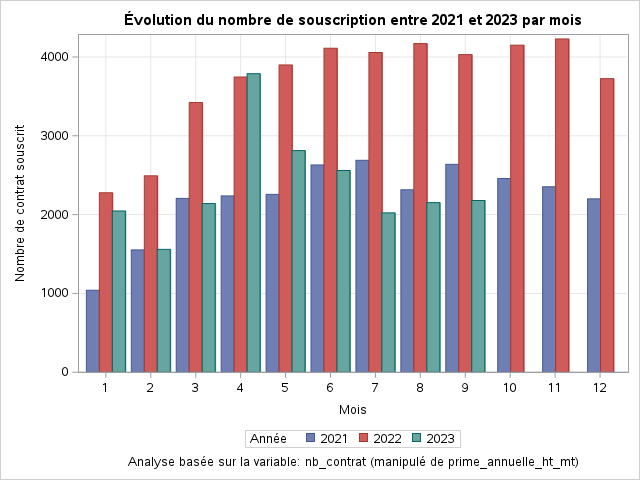

In [89]:
%%SAS sas

/* Création d'un dataset 'data_caht' à partir du dataset 'datafinal'.
Les années et mois sont extraits de la date 'saisie_contrat_dt'. */
data data_caht;
	set data.datafinal;
	year=year(saisie_contrat_dt);
	month=month(saisie_contrat_dt);
run;

/* Réalisation d'un résumé statistique pour 'data_caht', en calculant la somme
et le nombre de 'prime_annuelle_ht_mt' par année et mois. Le résultat est
stocké dans 'data_caht2'. */
proc summary data=data_caht sum n;
	var prime_annuelle_ht_mt;
	class year month;
	output out=data_caht2 sum=caht n=nb_contrat;
run;

/* Filtrage de 'data_caht2' pour garder uniquement les données des années
2021, 2022, et 2023, et formatage du chiffre d'affaires (caht). */
data data_caht3;
	set data_caht2;
	where year in (2021, 2022, 2023) and _TYPE_=3;
	drop _TYPE_ _FREQ_;
	format caht comma20.;
run;

/* Création d'un graphique à barres pour visualiser l'évolution mensuelle du
nombre de contrats souscrits entre 2021 et 2023. */
title 'Évolution du nombre de souscription entre 2021 et 2023 par mois';
footnote "Analyse basée sur la variable: nb_contrat (manipulé de prime_annuelle_ht_mt)";
proc sgplot data=data_caht3;
	vbar month / response=nb_contrat group=year groupdisplay=cluster;
	keylegend /location=outside;
	xaxis label='Mois' grid;
	yaxis label='Nombre de contrat souscrit' grid;
	label year='Année';
run;
title;


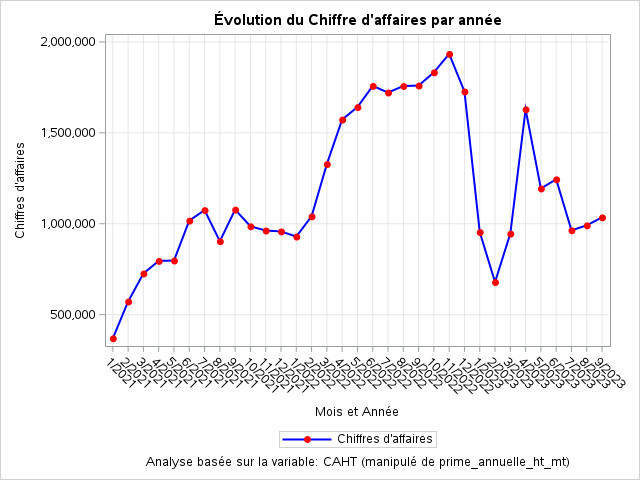

In [90]:
%%SAS sas

/* Nouveau résumé statistique de 'data_caht', cette fois par année, pour calculer
la somme et le nombre de 'prime_annuelle_ht_mt'. Résultat dans 'data_caht4'. */
proc summary data=data_caht sum n;
	var prime_annuelle_ht_mt;
	class year;
	output out=data_caht4 sum=CAHT n=nb_contrat;
run;

/* Création d'une nouvelle colonne 'monthyear' pour concaténer mois et année. */
data data_caht5;
	set data_caht3;
	monthyear=catx('/', month, year);
run;

/* Graphique en série temporelle montrant l'évolution du chiffre d'affaires
par mois et année. */
title "Évolution du Chiffre d'affaires par année";
footnote "Analyse basée sur la variable: CAHT (manipulé de prime_annuelle_ht_mt)";
proc sgplot data=data_caht5;
	series x=monthyear y=CAHT / lineattrs=(color=blue thickness=2) markers 
		markerattrs=(symbol=circlefilled color=red);
	keylegend /location=outside;
	label caht="Chiffres d'affaires";
	xaxis label='Mois et Année' grid;
	yaxis label="Chiffres d'affaires" grid;
run;
title; footnote;

## Analyse sur chiffre d’affaires par formule, fractionnement et produit

formule,Frequency,Percent,CumulativeFrequency,CumulativePercent
RC,35941,38.94,35941,38.94
VOL,22149,24.00,58090,62.93
TA,33721,36.53,91811,99.47
RCHC,493,0.53,92304,100.00

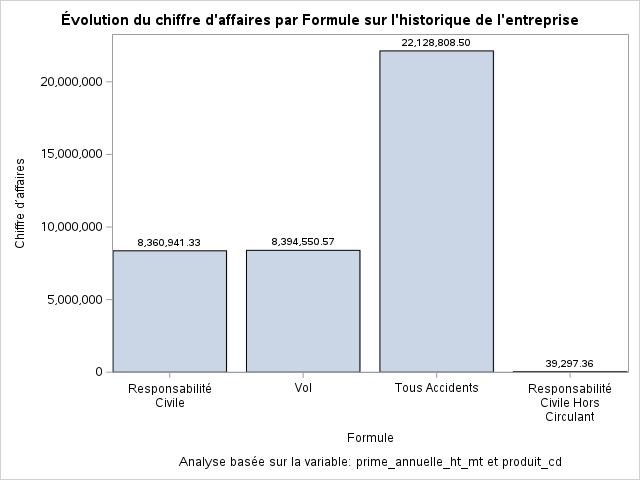

In [91]:
%%SAS sas

/* Création du dataset 'data_formule' à partir de 'datafinal'. Extraction du premier chiffre
de la chaîne 'formule_cd' et stockage dans la nouvelle colonne 'formule'. */

data data_formule;
	set data.datafinal;
	formule=substr(formule_cd, anydigit(formule_cd), 1);
run;

/* Analyse de fréquence de la variable 'formule' dans le dataset 'data_formule'.
Application du format 'formule_fmt.' pour afficher les résultats. */

proc freq data=data_formule;
	tables formule;
	format formule $formule_fmt.;
run;

/* Création d'un graphique à barres pour visualiser l'évolution du chiffre d'affaires
par formule sur toute l'histoire de l'entreprise. */

title "Évolution du chiffre d'affaires par Formule sur l'historique de l'entreprise";
footnote "Analyse basée sur la variable: prime_annuelle_ht_mt et produit_cd";
proc sgplot data=data_formule;
	vbar formule / response=prime_annuelle_ht_mt stat=sum datalabel;
	xaxis label='Formule';
	yaxis label="Chiffre d’affaires";
	format formule $formule_fmtx.;
run;
title; footnote;

In [92]:
%%SAS sas

/* Utilisation de PROC TABULATE pour créer un tableau récapitulatif du chiffre d'affaires,
par 'fractionnement_cd', 'formule' et 'partenaire_cd'. */

title "The TABULATE Procedure";
footnote "Analyse basée sur la variable: prime_annuelle_ht_mt et produit_cd";
proc tabulate data=data_formule f=comma15.2;
	var prime_annuelle_ht_mt;
	class fractionnement_cd formule partenaire_cd;
	tables 
		(fractionnement_cd)*(formule all*[style=[background=yellow color=red]]) 
		all*[style=[background=yellow color=red]], partenaire_cd*N 
		partenaire_cd*prime_annuelle_ht_mt*sum='' 
		prime_annuelle_ht_mt*all*sum=''*[style=[background=yellow color=red]] 
		prime_annuelle_ht_mt*PCTSUM='Pourcentage' / 
		box=[label='CAHT par Fractionnement et Formule'];
	format fractionnement_cd $fractionnement_fmt. partenaire_cd $partenaire_fmt. formule $formule_fmt.;
	keyword all sum / style=[background=yellow color=red];
	keylabel all='Total' N='Nombre de contrat';
	label fractionnement_cd='Fractionnement' formule='Formule' 
		prime_annuelle_ht_mt="Chiffre d'affaires" partenaire_cd="Distribution par";
run;
title; footnote;

In [102]:
%%SAS sas

proc freq data=data.datafinal;
tables fractionnement_cd / out=frac_freq;
format fractionnement_cd $fractionnement_fmt.
run;

proc print data=frac_freq; run;

In [103]:
frac_freq = sas.sd2df('frac_freq', 'work')

In [104]:
import pandas as pd
frac_freq.head()

,fractionnement_cd,COUNT,PERCENT
0,Annuel,28906.0,31.316086
1,Mensuel,59330.0,64.276738
2,Semestriel,2919.0,3.162376
3,Trimestriel,1149.0,1.244800


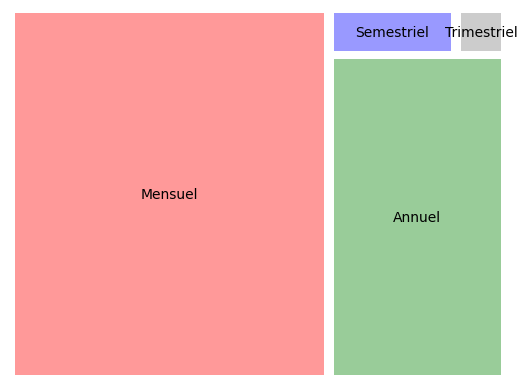

In [ ]:
import matplotlib.pyplot as plt
import squarify   # pip install squarify (algorithm for treemap)
import pandas as pd
frac_freq = pd.DataFrame(frac)
frac_freq = frac_freq.sort_values('COUNT', ascending=False)

# plot it
squarify.plot(sizes=frac_freq['COUNT'], label=frac_freq['fractionnement_cd'], color=["red","green","blue", "grey"], alpha=.4, pad=0.25 )
plt.axis('off')
plt.show()


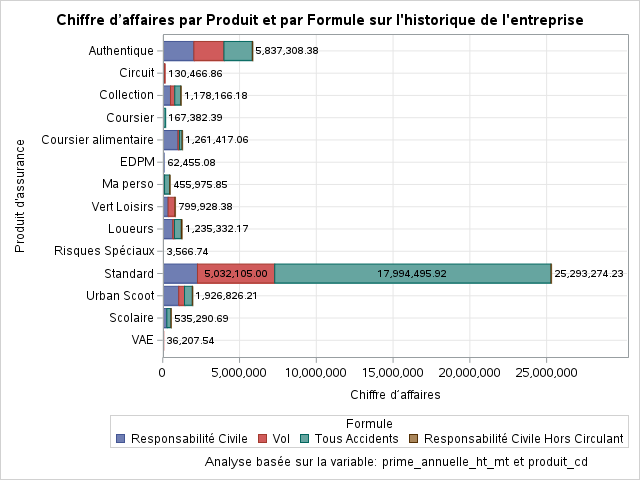

In [93]:
%%SAS sas

/* Visualisation du chiffre d’affaires par produit et par formule avec un histogramme
horizontal. Groupement des données par 'formule' et utilisation des labels sur les segments. */

title "Chiffre d’affaires par Produit et par Formule sur l'historique de l'entreprise";
footnote "Analyse basée sur la variable: prime_annuelle_ht_mt et produit_cd";
proc sgplot data=data_formule;
	hbar produit_cd / response=prime_annuelle_ht_mt group=formule stat=sum 
		datalabel groupdisplay=stack seglabel;
	keylegend / opaque across=4 position=bottomright location=outside;
 	xaxis label='Chiffre d’affaires' grid;
  	yaxis label="Produit d'assurance" grid;
	format produit_cd $produit_fmt. formule $formule_fmtx.;
	label formule='Formule';
run;
title; footnote;

## Répartition des sociétaires par sexe

In [76]:
%%SAS sas

/* Utilisation de PROC FREQ pour analyser la fréquence de la variable 'societaire_sexe_cd' 
   dans le dataset 'data.datafinal'. Création d'un tableau de fréquence 'sexe_freq'. */

proc freq data=data.datafinal;
	tables societaire_sexe_cd / out=sexe_freq;
	format societaire_sexe_cd societaire_sexe_fmt.;
run;

/* Transformation du dataset 'sexe_freq'. Conversion du code de sexe en texte 
   lisible et ajustement du pourcentage. */

data sexe_freq2;
	set sexe_freq;
	sexe = put(societaire_sexe_cd, societaire_sexe_fmt.);
	percent = percent/100;
run;

/* Création d'un graphique en secteurs (pie chart) pour visualiser la répartition 
   des sociétaires par sexe. Affichage du pourcentage dans chaque secteur. */
   
title "Répartition des sociétaires par sexe";
footnote "Analyse basée sur la variable : societaire_sexe_cd";
proc gchart data=sexe_freq2;
	pie sexe / sumvar=percent noheading;
	format percent percent10.2;
run;
title;


societaire_sexe_cd,Frequency,Percent,CumulativeFrequency,CumulativePercent
Non renseigné,6726,7.29,6726,7.29
Femme,7348,7.96,14074,15.25
Homme,78230,84.75,92304,100.00


## Répartition des sociétaires par socio-professionnel

In [77]:
%%SAS sas

/* Création du dataset 'data_socio' à partir du dataset 'datafinal'
en remplaçant toutes les valeurs manquantes de 'societaire_csp_cd' par -1. */

data data_socio;
	set data.datafinal;
	if societaire_csp_cd = . then societaire_csp_cd = -1; 
run;

/* Analyse de la fréquence de la catégorie socio-professionnelle des sociétaires 
   (societaire_csp_cd) avec PROC FREQ. Création du tableau 'socio_pro'. */

proc freq data=data_socio;
	tables societaire_csp_cd / out=socio_pro;
	format societaire_csp_cd societaire_csp_fmt.;
run;

/* Transformation du dataset 'socio_pro' pour convertir le code socio-professionnel 
   en une chaîne de caractères lisible. Calcul du pourcentage. */

data socio_freq;
	set socio_pro;
	pro_cl = put(societaire_csp_cd, societaire_csp_fmt.);
	percent = percent/100;
run;

/* Génération d'un autre graphique en donut pour la répartition des sociétaires 
   par catégorie socio-professionnelle avec la catégorie 'Autres'. */
   
title "Répartition des sociétaires par socio-professionnel";
footnote "Analyse basée sur la variable : societaire_csp_cd";
proc gchart data=socio_freq;
	where pro_cl is not missing;
	donut pro_cl / sumvar=percent otherlabel='Autres' noheading;
	format percent percent10.2;
run;
title; footnote;


societaire_csp_cd,Frequency,Percent,CumulativeFrequency,CumulativePercent
Non spécifié,41849,45.34,41849,45.34
Agriculteurs exploitants,489,0.53,42338,45.87
Artisans commerçants,3913,4.24,46251,50.11
Chef d'entreprises de plus de 10 salariés,366,0.40,46617,50.50
Professions libérales et artistiques,1702,1.84,48319,52.35
Cadres,5533,5.99,53852,58.34
Professions intermédiaires,2780,3.01,56632,61.35
Employés,25407,27.53,82039,88.88
Ouvriers,4192,4.54,86231,93.42
Retraités,1798,1.95,88029,95.37


## Répartition des sociétaires par territoire

In [79]:
%%SAS sas

/* Utilisation de PROC FREQ pour analyser la fréquence des sociétaires par territoire 
   en utilisant la variable 'societaire_drom_pom_com_in'. Le tableau des fréquences 
   est stocké dans 'territoire_freq'. */

proc freq data=data.datafinal;
	tables societaire_drom_pom_com_in / out=territoire_freq;
	format societaire_drom_pom_com_in $societaire_drom_pom_com_fmt.;
run;

/* Préparation du dataset 'territoire_freq2' à partir de 'territoire_freq' avec 
   ajustement du pourcentage pour l'analyse. */

data territoire_freq2;
	set territoire_freq;
	percent = percent/100;
run;

/* Création d'un graphique en secteurs (pie chart) pour visualiser la répartition 
   des sociétaires par territoire. Affichage du pourcentage dans chaque secteur. */
   
title "Répartition des sociétaires par territoire";
footnote "Analyse basée sur la variable : societaire_drom_pom_com_in";
proc gchart data=territoire_freq2;
	pie societaire_drom_pom_com_in / sumvar=percent noheading;
	format percent percent10.2;
run;
title; footnote;


## Répartition des sociétaires par département

In [80]:
%%SAS sas

/* Création du dataset 'data_dpt' à partir de 'datafinal'. Extraction des deux 
   premiers caractères du code postal pour définir le département (dpt). */

data data_dpt;
	set data.datafinal;
	if lengthn(code_postal_cd) = 5 then dpt = substr(code_postal_cd, 1, 2);
	else if lengthn(code_postal_cd) = 4 then dpt = '0' !! substr(code_postal_cd, 1, 1);
	label dpt = 'Département';
run;

/* Nettoyage et normalisation des données de département dans 'data_dpt2'. 
   Remplacement des valeurs incohérentes ou manquantes. */

data data_dpt2;
	length dpt $25;
	set data_dpt (rename=(dpt=dpt_corr));
	if dpt_corr = '00' then dpt = 'Valeur Manquante';
	else if dpt_corr = '' then dpt = 'Valeur non Saisie';
	else if dpt_corr in ('NH', 'SW') then dpt = 'Valeur Invalide';
	else dpt = dpt_corr;
run;

/* Analyse de fréquence des départements avec PROC FREQ. Création du tableau 
   'dpt_freq' avec des statistiques cumulatives. */

proc freq data=data_dpt2 order=freq nlevels;
	tables dpt / out=dpt_freq outcum;
	format dpt $dpt_fmt.;
	label dpt = 'Département';
run;

/* Filtrage et ajustement des pourcentages dans 'dpt_freq2' pour exclure les 
   valeurs non significatives. */

data dpt_freq2;
	set dpt_freq;
	where dpt not like 'Valeur%';
	percent = percent / 100;
	cum_pct = cum_pct / 100;
	format percent percent10.2 cum_pct percent10.2;
run;

/* Utilisation de PROC SQL pour afficher les 5 départements les plus populaires. */

title 'Top 5 des départements les plus populaires';
footnote 'Analyse basée sur la variable : dpt (extraite de code_postal_cd)';
proc sql outobs=5;
	select dpt 'Département', count "Nombre d'occurerences", percent 
		'Pourcentage par rapport au total', cum_pct 'Pourcentage cumulé' 
	from dpt_freq2 
	order by count desc;
quit;
title; footnote;

/* Tri des données dans 'dpt_freq2' pour préparer l'analyse des départements 
   les moins populaires. */

proc sort data=dpt_freq2;
	by count;
run;

/* Création de 'dpt_freq3' pour les 5 départements les moins populaires avec 
   cumul des pourcentages. */

data dpt_freq3;
	set dpt_freq2 (keep=dpt count percent);
	if _N_ le 5;
	cum_pct + percent;
	format cum_pct percent10.2;
run;

/* Utilisation de PROC SQL pour lister les 5 départements les moins populaires. */

title 'Top 5 des départements les moins populaires';
footnote 'Analyse basée sur la variable : dpt (extraite de code_postal_cd)';
proc sql outobs=5;
	select dpt 'Département', count "Nombre d'occurerences", percent 
		'Pourcentage par rapport au total', cum_pct 'Pourcentage cumulé' 
	from dpt_freq3 order by count asc;
quit;
title; footnote;


## Répartition des sociétaires par bureau de gestion

In [81]:
%%SAS sas

/* Analyse de la fréquence des codes des bureaux de gestion avec PROC FREQ. 
   Création du tableau 'bureau_freq' incluant des statistiques cumulatives. */

proc freq data=data.datafinal order=freq nlevels;
	tables bureau_gestion_cd / out=bureau_freq outcum;
	format bureau_gestion_cd bureau_gestion_fmt.;
	label bureau_gestion_cd = 'Bureau de gestion';
run;

/* Nettoyage et préparation du dataset 'bureau_freq2'. Exclusion des valeurs 
   inappropriées (-1) et formatage des codes de bureau de gestion. */
data bureau_freq2;
	set bureau_freq (rename=(bureau_gestion_cd=bureau_gestion_cd_char));
	where bureau_gestion_cd_char ~= -1;
	bureau_gestion_cd = put(bureau_gestion_cd_char, bureau_gestion_fmt.);
	percent = percent / 100;
	cum_pct = cum_pct / 100;
	format percent percent10.3 cum_pct percent10.3;
	drop bureau_gestion_cd_char;
run;

/* Utilisation de PROC SQL pour afficher le top 10 des bureaux de gestion les 
   plus performants en termes d'occurrences. */

title 'Top 10 des bureaux de gestion les plus performants';
footnote "Analyse basée sur la variable : bureau_gestion_cd ";
proc sql outobs=10;
	select bureau_gestion_cd 'Bureau de gestion', count "Nombre de d'occurrences", 
		percent 'Pourcentage par rapport au total', cum_pct 'Pourcentage cumulé' 
	from bureau_freq2 
	order by count desc;
quit;
title; footnote;

/* Tri des données dans 'bureau_freq2' en préparation pour l'analyse des bureaux 
   de gestion les moins performants. */

proc sort data=bureau_freq2;
	by count;
run;

/* Création du dataset 'bureau_freq3' pour le top 10 des bureaux de gestion les 
   moins performants, avec cumul des pourcentages. */

data bureau_freq3;
	set bureau_freq2 (keep=bureau_gestion_cd count percent);
	if _N_ le 10;
	cum_pct + percent;
	format cum_pct percent10.3;
run;

/* Utilisation de PROC SQL pour lister le top 10 des bureaux de gestion les 
   moins performants en termes d'occurrences. */
   
title 'Top 10 bureaux de gestion les moins performants';
footnote "Analyse basée sur la variable : bureau_gestion_cd ";
proc sql outobs=10;
	select bureau_gestion_cd 'Bureau de gestion', count "Nombre de d'occurrences", 
		percent 'Pourcentage par rapport au total', cum_pct 'Pourcentage cumulé' 
		from bureau_freq3 
		order by count asc;
quit;
title; footnote;


## Répartition des sociétaires par âge


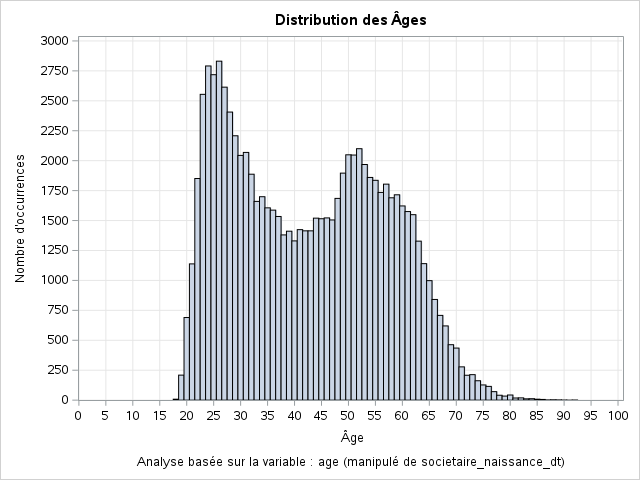

In [94]:
%%SAS sas

 /* Création du dataset 'data_age' à partir de 'datafinal'. Calcul de l'âge des sociétaires 
   à partir de leur date de naissance. Les valeurs manquantes sont marquées comme -1. */

data data_age;
	set data.datafinal;
	if societaire_naissance_dt = . then age = -1;
	else age = year(today()) - year(societaire_naissance_dt);
run;

/* Analyse de la distribution des âges avec PROC FREQ. Création du tableau 'age_freq'. */
proc freq data=data_age nlevels;
	tables age / out=age_freq;
	label age = 'Age';
run;

/* Création d'un histogramme pour visualiser la distribution des âges, en excluant 
   les valeurs non renseignées (-1). */

title "Distribution des Âges";
footnote "Analyse basée sur la variable : age (manipulé de societaire_naissance_dt)";
proc sgplot data=data_age;
	where age ne -1;
	histogram age / scale=count binwidth=1;
	xaxis label = "Âge" values = (0 to 100 by 1) grid;
	yaxis label = "Nombre d'occurrences" values = (0 to 3000 by 250) grid;
run;
title; footnote;


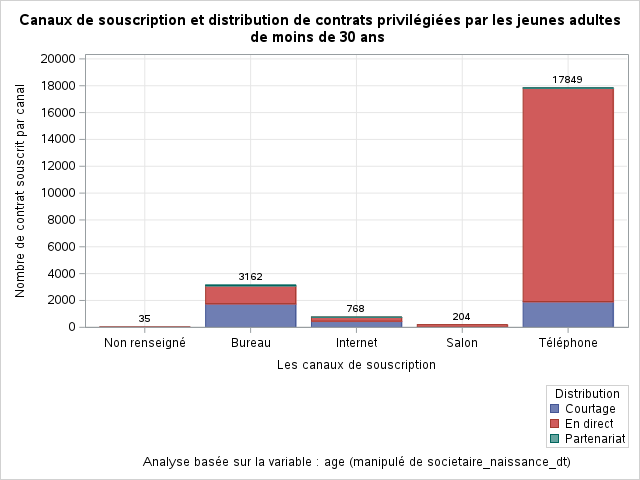

In [95]:
%%SAS sas

/* Définition d'un format personnalisé 'age_fmt' pour catégoriser les âges. */

proc format;
	value age_fmt
	-1 = 'Non renseigné' 
	18 - 29 = 'Moins de 30 ans' 
	30 - 50 = 'Entre 30 ans et 50 ans' 
	51 - high = 'Plus de 50 ans';

/* Analyse de fréquence des catégories d'âge définies dans 'age_fmt'. */

footnote "Analyse basée sur la variable : age (manipulé de societaire_naissance_dt)";
proc freq data=data_age;
	tables age;
	format age age_fmt.;
run;
footnote;

/* Analyse des canaux de souscription et des méthodes de distribution pour les 
   sociétaires de moins de 30 ans. */

proc freq data=data_age;
	where age ne -1 and age < 30;
	tables canal_souscription_cd*contrat_distrib_lb / nocol out=age30_canal_distr;
	format canal_souscription_cd $canal_souscription_fmt.;
run;

/* Visualisation des résultats de l'analyse précédente avec un diagramme à barres. */

title "Canaux de souscription et distribution de contrats privilégiées par les jeunes adultes de moins de 30 ans";
footnote "Analyse basée sur la variable : age (manipulé de societaire_naissance_dt)";
proc sgplot data=age30_canal_distr;
	vbar canal_souscription_cd / response=count datalabel group=contrat_distrib_lb 
		groupdisplay=stack;
	keylegend / opaque across=1 position=bottomright location=outside;
	xaxis label = "Les canaux de souscription" grid;
	yaxis label = "Nombre de contrat souscrit par canal" values = (0 to 20000 by 2000) grid;
	label contrat_distrib_lb = 'Distribution';
run;
title; footnote;


## Répartition de type de véhicule


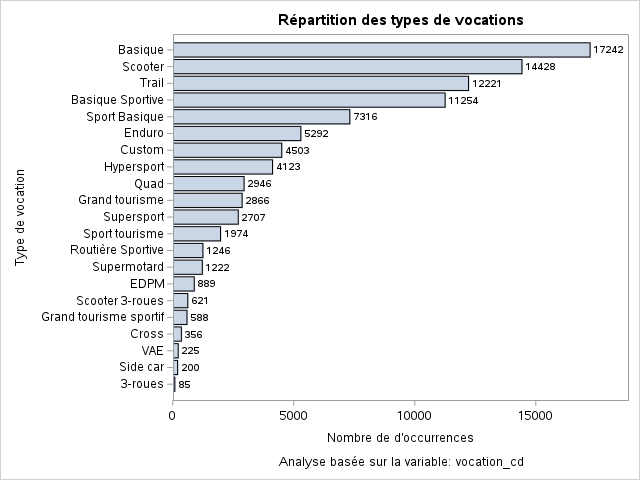

In [87]:
%%SAS sas

/* Utilisation de PROC FREQ pour analyser la fréquence des différents types de vocation 
   ('vocation_cd') dans le dataset 'data.datafinal'. Création des tableaux 'vocation_freq' 
   et 'vocation_freq_outcum' pour les fréquences et les cumuls. */

proc freq data=data.datafinal order=freq nlevels;
	tables vocation_cd / out=vocation_freq outcum;
	format vocation_cd $vocation_fmt.;
run;

/* Création d'un graphique à barres horizontales pour visualiser la répartition des types 
   de vocations. Les données sont triées en ordre décroissant. */

title "Répartition des types de vocations";
footnote "Analyse basée sur la variable: vocation_cd ";
proc sgplot data=vocation_freq;
	hbar vocation_cd / response=count categoryorder=respdesc datalabel;
	format vocation_cd $vocation_fmt.;
	label vocation_cd = "Type de vocation" count = "Nombre de d'occurrences";
run;
title; footnote;

## Répartition de marque de véhicule

In [88]:
%%SAS sas

/* Utilisation de PROC FREQ pour analyser la fréquence des marques de véhicules 
   sans afficher les résultats. */

proc freq data=data.datafinal order=freq nlevels noprint;
	tables marque_vehicule_lb;
run;

/* Exporter les données dans un fichier Excel et vérifier la position 
   des observations avec des noms de marque invalides.
proc export data=data.datafinal
   outfile="&path/data_out/datafinal.xlsx"
   dbms=xlsx replace;
run; 
LOG:
 NOTE:    Invalid UTF-8 text removed at cell -> AN65293
 NOTE:    Invalid UTF-8 text removed at cell -> AN73917
 NOTE:    Invalid UTF-8 text removed at cell -> AN82148
*/

/* Création du dataset 'invalid_marque' pour identifier spécifiquement les observations 
   avec des marques de véhicules invalides, basées sur leurs numéros de ligne. */

data invalid_marque;
	set data.datafinal;
	if _N_ in (65292, 73916, 82147); /* N-1 car il y a des headers lors de l'exportation en Excel. */
	putlog "Observation N = " _N_ ", la marque invalide est: " marque_vehicule_lb=:;
	keep marque_vehicule_lb;
run;

/*
Observation N = 65292 , la marque invalide est: marque_vehicule_lb=Ino�
Observation N = 73916 , la marque invalide est: marque_vehicule_lb=riese & m�ller
Observation N = 82147 , la marque invalide est: marque_vehicule_lb=Mi �lectric scoot
*/

/* Création du dataset 'data_marque' en excluant les observations avec des marques 
   de véhicules invalides. */

data data_marque;
	set data.datafinal;
	if _N_ in (65292, 73916, 82147) then delete;
run;

/* Utilisation de PROC FREQ pour créer un tableau de fréquence des marques de véhicules 
   valides, stocké dans 'marque_freq'. */

proc freq data=data_marque order=freq nlevels noprint;
	tables marque_vehicule_lb / out=marque_freq outcum;
run;

/* Préparation du dataset 'marque_freq2' avec ajustement des pourcentages pour l'analyse. */
data marque_freq2;
	set marque_freq;
	percent = percent / 100;
	cum_pct = cum_pct / 100;
	drop cum_freq;
	format percent percent10.2 cum_pct percent10.2;
run;

/* Utilisation de PROC SQL pour afficher les 10 marques de véhicules les plus populaires. */

title 'Top 10 des marques de motocycle les plus populaires';
footnote 'Analyse basée sur la variable : marque_vehicule_lb';
proc sql outobs=10;
	select marque_vehicule_lb 'Marque de véhicule', count 
		"Nombre de d'occurrences", percent 'Pourcentage par rapport au total', 
		cum_pct 'Pourcentage cumulé' 
	from marque_freq2 
	order by count desc;
quit;
title; footnote;

Marque de véhicule,Nombre de d'occurrences,Pourcentage par rapport au total,Pourcentage cumulé
YAMAHA,15316,16.59%,16.59%
HONDA,13439,14.56%,31.15%
SUZUKI,7960,8.62%,39.78%
BMW,6894,7.47%,47.25%
KAWASAKI,6586,7.14%,54.38%
KTM,4065,4.40%,58.79%
TRIUMPH,3512,3.80%,62.59%
DUCATI,2898,3.14%,65.73%
PIAGGIO,2786,3.02%,68.75%
HARLEY-DAVIDSON,2732,2.96%,71.71%


# Synthèse, actions proposées et conclusion

## Synthèse
La procédure des analyses financières, démographiques, géographiques, et de préférences de produits pour Zenor révèle plusieurs axes stratégiques clés pour l'entreprise afin d'atteindre ses objectifs de direction générale :

1. **Situation financière et performance des produits :** Les formules d'assurance intégrale tels que « Tous Accidents » génèrent le plus gros chiffre d'affaires, ce qui indique une inclinaison des clients vers des solutions d'assurance complètes. Les offres de base, telles que les formules « Responsabilité Civile » et « Vol », maintiennent une solide performance, suggérant que les fondamentaux restent essentiels pour une majorité de clients.
   
   La préférence des clients pour les paiements annuels et mensuels suggère une demande pour des options de paiement flexibles, facilitant la gestion financière personnelle des clients et offrant une prévisibilité des flux de trésorerie pour Zenor.
   
   Les produits « Standard » et « Authentique » représentent la majorité du chiffre d'affaires des produits, confirmant leur position de pilier dans l'offre de Zenor. En même temps, l'existence de produits spécialisés et de niche démontre la capacité de Zenor à attirer et à servir des segments diversifiés de marché, bien que ceux-ci contribuent moins au chiffre d'affaires global.

2. **Ciblage démographique :** L'âge des sociétaires montre une forte représentation des moins de 30 ans et une présence significative des tranches d'âge intermédiaires. Zenor devrait continuer à développer des produits d'assurance adaptés aux jeunes adultes tout en optimisant ses offres pour les clients d'âge mûr, qui peuvent rechercher une couverture plus complète.

3. **Stratégie géographique :** La prédominance des sociétaires en Métropole versus l'OutreMer et la distribution inégale entre les différents bureaux de gestion indiquent la nécessité d'une stratégie de marché différenciée qui tient compte des spécificités régionales et optimise la présence dans les zones sous-représentées.

4. **Répartition socio-professionnelle :** La diversification socio-professionnelle des sociétaires de Zenor démontre une clientèle diversifiée, avec une présence notable d'employés, suivie par des cadres, des artisans commerçants, et d'autres catégories professionnelles. Cette variété indique que les offres d'assurance de Zenor attirent un large éventail de professions. Zenor peut créer des offres plus personnalisées qui répondent aux besoins uniques de chaque segment, favorisant ainsi une plus grande fidélisation et une expansion du marché.

5. **Préférences de souscription :** L'analyse des canaux de souscription a montré une préférence marquée pour le téléphone, indiquant que les sociétaires valorisent l'interaction directe et personnelle. Cependant, il existe un potentiel inexploité dans l'optimisation du canal Internet, en particulier pour attirer la clientèle plus jeune qui est à l'aise avec les technologies numériques. Renforcer la présence digitale de Zenor, améliorer l'expérience utilisateur en ligne et intégrer les technologies mobiles sont des stratégies clés pour saisir ce potentiel.

6. **Préférences de véhicules :** L'analyse des marques de motos les plus assurées montre une préférence pour les constructeurs japonais, suivie de marques européennes et américaines. Cette diversité marque une opportunité pour Zenor de peaufiner son offre d'assurance pour s'aligner avec la réputation et le positionnement de chaque marque, en particulier dans les segments premium et spécialisés.

   De plus, La prédominance des motos basiques et des scooters reflète une tendance vers des véhicules pratiques pour la vie quotidienne et l'utilisation urbaine. Cela indique une opportunité pour Zenor de concentrer ses ressources sur la consolidation de sa position dans ces segments tout en restant attentif aux niches de marché telles que les motos sportives et de loisirs, où des produits spécialisés peuvent être développés.

## Action proposées

Pour atteindre les objectifs de la direction générale, qui incluent l'augmentation des parts de marché, la réduction du taux de résiliation et l'attraction des jeunes de moins de 30 ans, Zenor devrait :
1.	**Amélioration de l'expérience de souscription en ligne :**
    - Capitaliser sur la tendance croissante à l'utilisation des services en ligne, en particulier parmi les clients plus jeunes, en améliorant l'interface utilisateur et en simplifiant le processus de souscription numérique.
    - Intégrer des outils d'intelligence artificielle et des chatbots pour fournir une aide instantanée et personnalisée lors de la souscription en ligne.
2.	**Personnalisation des produits pour les niches de marché :**
    -   Créer des offres sur mesure pour des niches de marché, telles que les motos spécialisées et les véhicules électriques, pour répondre à des besoins spécifiques.
    -   Établir des partenariats avec des clubs de motards, des associations et des groupes de loisirs pour offrir des polices groupées et personnalisées.
3.	**Stratégies tarifaires flexibles :**
    - Proposer des plans de paiement ajustables qui peuvent changer avec les circonstances financières du client, comme des options de report de paiement ou des ajustements de couverture.
4.	**Exploitation les données démographiques et comportementales pour affiner ses stratégies de cross-selling et de fidélisation :**
    - Développer des produits d'assurance adaptés aux femmes.
    - Développer des campagnes marketing ciblées selon les tranches d'âge et les préférences régionales.
    - Créer des partenariats avec des marques de motos les plus populaires pour des offres conjointes.
    - Offrir des services et des couvertures adaptés aux spécificités des différents types de véhicules.


## Conclusion
En conclusion, l'analyse complète des données de Zenor dévoile une entreprise avec un potentiel considérable de croissance et d'optimisation. 
Cependant, l’entreprise est face à un marché varié et complexe, et doit donc poursuivre une stratégie ciblée et data-driven pour optimiser ses opérations et saisir les opportunités de marché.
En exploitant les insights des données client, Zenor serait bien positionnée pour répondre aux attentes de sa direction et aux besoins de ses clients, tout en consolidant sa présence sur le marché de l'assurance des deux-roues.


In [74]:
#sas.disconnect()

In [75]:
#sas._endsas()